<a href="https://colab.research.google.com/github/BrianArnesto/masterThesis/blob/main/Master_Thesis_Bert_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
https://scikit-learn.org/stable/modules/sgd.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
https://github.com/leelaylay/TweetSemEval
https://towardsdatascience.com/yet-another-twitter-sentiment-analysis-part-1-tackling-class-imbalance-4d7a7f717d44
https://github.com/cbaziotis/datastories-semeval2017-task4


# Load the *library*

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 21.3 MB/s eta 0:00:00


In [3]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 46.2 MB/s eta 0:00:

In [4]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 871 µs (started: 2023-01-10 09:43:34 +00:00)


In [5]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=a2f5cd1cafbb0f7d05371adcd6c1b3a8e50dcfe1ebbbb3da0dfb271f6c8348da
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
time: 10.4 s (started: 2023-01-10 09:43:34 +00:00)


In [6]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 15.2 MB/s eta 0:00:00
time: 6.8 s (started: 2023-01-10 09:43:45 +00:00)


In [7]:
#Library for stemming Indonesian (Bahasa) text
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 17.1 MB/s eta 0:00:00
time: 6.79 s (started: 2023-01-10 09:43:51 +00:00)


In [76]:
import requests
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive
from collections import Counter
import pycaret
from transformers import BertTokenizer, AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
import torch
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import torch.nn as nn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


drive.mount('/content/drive')
# specify GPU
device = torch.device("cuda")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.72 s (started: 2023-01-10 10:22:16 +00:00)


#Data Fetch 

In [ ]:
url = 'http://maps.googleapis.com/maps/api/directions/json'

params = dict(
    origin='Chicago,IL',
    destination='Los+Angeles,CA',
    waypoints='Joplin,MO|Oklahoma+City,OK',
    sensor='false'
)

resp = requests.get(url=url, params=params)
data = resp.json() # Check the JSON Response Content documentation below

print(data)

In [ ]:
url = 'https://yudistira.turnbackhoax.id/api/antihoax/'

headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Accept': 'application/json'
}

body = {
    'key': '231b200cxb534x5c797a432dd30b0vc2',
    'limit': 1000
}

resp = requests.post(url=url, headers=headers, data=body)
data = resp.json()

print(data)

In [ ]:
len(data)

In [ ]:
#Get total number of dataset in mafindo server
url = 'https://yudistira.turnbackhoax.id/api/antihoax/get_total'
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Accept': 'application/json'
}

body = {
    'key': '231b200cxb534x5c797a432dd30b0vc2'
}

resp = requests.post(url=url, headers=headers, data=body)
total = resp.json() # Check the JSON Response Content documentation below

print(total)

In [ ]:
def fetch_data(offset):
  url = 'https://yudistira.turnbackhoax.id/api/antihoax/'

  headers = {
      'Content-Type': 'application/x-www-form-urlencoded',
      'Accept': 'application/json'
  }

  body = {
      'key': '231b200cxb534x5c797a432dd30b0vc2',
      'limit': 1000,
      'offset': offset
  }

  resp = requests.post(url=url, headers=headers, data=body)
  data = resp.json()
  return data

data_list = []
offset = 0
for i in range(10):
  d = fetch_data(offset)
  offset += len(d)
  data_list += d
  # sleep(2)

print(len(data_list))

In [ ]:
data_list

In [ ]:
d = fetch_data(10000)
data_list += d

In [ ]:
data_list

In [ ]:
#Convert json dataset into pandas dataframe
df = pd.DataFrame.from_records(data_list)

In [ ]:
#export the dataset into csv in the google drive
df.to_csv('/content/drive/MyDrive/thesis/news.csv', sep='\t')

#Data Preprocessing

###Load the dataset

In [9]:
df = pd.read_csv('/content/drive/MyDrive/thesis/news.csv', sep='\t')

time: 2.34 s (started: 2023-01-10 10:03:49 +00:00)


###Load the Indonesian Langguage stopword

In [10]:
id_stopword_dict = pd.read_csv('/content/drive/MyDrive/thesis/stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

time: 223 ms (started: 2023-01-10 10:03:51 +00:00)


In [11]:
id_stopword_dict.head()

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


time: 15.4 ms (started: 2023-01-10 10:03:51 +00:00)


###Load the Indonesian Slang Dataset

In [12]:
alay_dict = pd.read_csv('/content/drive/MyDrive/thesis/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

time: 271 ms (started: 2023-01-10 10:03:51 +00:00)


###Overview of the dataset

In [13]:
print("Shape: ", df.shape)
df.head(15)

Shape:  (10756, 16)


,Unnamed: 0,id,authors,status,classification,title,content,fact,references,source_issue,source_link,picture1,picture2,tanggal,tags,conclusion
0,0,10928,29,2,-,Cek Fakta: Hoaks Kabar Nikita Mirzani Meningga...,"\nLiputan6.com, Jakarta - Kabar tentang artis ...",\nCek Fakta Liputan6.com menelusuri kabar tent...,NaN,liputan6.com,https://www.liputan6.com/cek-fakta/read/512206...,https://cdn0-production-images-kly.akamaized.n...,NaN,2022-11-11,"cekfakta, liputan6, cekfakta-liputan6",\nKabar tentang artis Nikita Mirzani meninggal...
1,1,10927,29,2,-,Cek Fakta: Tidak Benar Tepung Beras Bisa Mered...,"\nLiputan6.com, Jakarta - Klaim tentang menemp...",\nCek Fakta Liputan6.com menelusuri klaim mene...,NaN,liputan6.com,https://www.liputan6.com/cek-fakta/read/512197...,https://cdn0-production-images-kly.akamaized.n...,NaN,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6",\nKlaim menempelkan adonan tepung beras di tub...
2,2,10926,36,2,Misleading Content,[SALAH] Menkes Budi Gunadi Sadikin: “Diabetes ...,Akun Facebook bernama TH K menyebarluaskan tau...,Setelah dilakukan penelusuran dengan Google Re...,https://www.cnnindonesia.com/nasional/20210426...,facebook.com,https://archive.cob.web.id/archive/1667651236....,https://turnbackhoax.id/wp-content/uploads/202...,NaN,2022-11-10,"cekfakta, tbh, tema: kesehatan, alat: teks, sc...",Hasil periksa fakta Evarizma Zahra.\r\n\r\nKon...
3,3,10925,29,2,-,Cek Fakta: Tidak Benar Video Wanita Tertua di ...,"\nLiputan6.com, Jakarta - Sebuah video yang di...",\nCek Fakta Liputan6.com menelusuri video yang...,https://www.thetealmango.com/latest/who-is-399...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512178...,https://cdn1-production-images-kly.akamaized.n...,https://cdn1-production-images-kly.akamaized.n...,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6",\nVideo yang diklaim seorang wanita tertua di ...
4,4,10924,29,2,-,Cek Fakta: Tidak Benar Kondisi AS Terkena Damp...,"\nLiputan6.com, Jakarta- Cek Fakta Liputan6.co...",\nCek Fakta Liputan6.com menelusuri klaim vide...,\nhttps://vanlifewanderer.com/2022/08/03/kens...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512121...,https://cdn0-production-images-kly.akamaized.n...,https://cdn1-production-images-kly.akamaized.n...,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6","\nHasil penelusuran Cek Fakta Liputan6.com, kl..."
5,5,10923,36,2,Misleading Content,[SALAH] Kebijakan Pemerintah Tiongkok yang Mew...,Akun Twitter dengan nama pengguna “uytimes” me...,"Berdasarkan hasil penelusuran, narasi tersebut...",https://www.douyin.com/video/70471093072544924...,twitter.com,https://archive.cob.web.id/archive/1667926200....,https://turnbackhoax.id/wp-content/uploads/202...,NaN,2022-11-10,"cekfakta, tbh, tema: kesehatan, alat: mixed, s...",Hasil Periksa Fakta Khairunnisa A.\r\n\r\nHoak...
6,6,10922,36,2,Misleading Content,[SALAH] Wanita berusia 399 Tahun,"""399 Years Women, Oldest woman in the world""\n...",Beredar video Tiktok yang diunggah oleh @bria...,https://turnbackhoax.id/2022/04/05/salah-video...,Tiktok,https://archive.cob.web.id/archive/1667920179....,https://turnbackhoax.id/wp-content/uploads/202...,NaN,2022-11-09,"Cek fakta, tbh, tema: unik, alat: mixed, SC: T...",Hasil Periksa Fakta Dyah Febriyani. Narasi dal...
7,7,10921,29,2,-,Cek Fakta: Tidak Benar Vaksin Genosida Uni Ero...,"\nLiputan6.com, Jakarta- Cek Fakta Liputan6.co...",\nCek Fakta Liputan6.com menelusuri klaim vaks...,NaN,liputan6.com,https://www.liputan6.com/cek-fakta/read/512085...,https://cdn0-production-images-kly.akamaized.n...,NaN,2022-11-09,"cekfakta, liputan6, cekfakta-liputan6","\nHasil penelusuran Cek Fakta Liputan6.com, kl..."
8,8,10920,29,2,-,Cek Fakta: Tidak Benar Mantan Presiden Soehart...,"\nLiputan6.com, Jakarta - Beredar di media sos...",\nCek Fakta Liputan6.com menelusuri dan menemu...,https://www.liputan6.com/news/read/5115252/jok...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512069...,https://cdn1-production-images-kly.akamaized.n...,NaN,2022-11

time: 38.9 ms (started: 2023-01-10 10:03:52 +00:00)


In [14]:
df.describe()

,Unnamed: 0,id,status
count,10756.000000,10756.000000,10756.000000
mean,5377.500000,5488.900149,2.128486
std,3105.134082,3152.556646,0.841311
min,0.000000,4.000000,0.000000
25%,2688.750000,2743.750000,2.000000
50%,5377.500000,5509.500000,2.000000
75%,8066.250000,8223.250000,2.000000
max,10755.000000,10928.000000,15.000000


time: 29.8 ms (started: 2023-01-10 10:03:52 +00:00)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10756 entries, 0 to 10755
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10756 non-null  int64 
 1   id              10756 non-null  int64 
 2   authors         10337 non-null  object
 3   status          10756 non-null  int64 
 4   classification  10756 non-null  object
 5   title           10755 non-null  object
 6   content         10466 non-null  object
 7   fact            10553 non-null  object
 8   references      10694 non-null  object
 9   source_issue    10031 non-null  object
 10  source_link     7642 non-null   object
 11  picture1        10464 non-null  object
 12  picture2        1981 non-null   object
 13  tanggal         10756 non-null  object
 14  tags            10731 non-null  object
 15  conclusion      6571 non-null   object
dtypes: int64(3), object(13)
memory usage: 1.3+ MB
time: 31.2 ms (started: 2023-01-10 10:03:52 +00:

In [16]:
df['classification'].isnull().sum()

0

time: 5.61 ms (started: 2023-01-10 10:03:52 +00:00)


In [17]:
df['classification'].describe()

count                  10756
unique                    10
top       Misleading Content
freq                    2629
Name: classification, dtype: object

time: 17.3 ms (started: 2023-01-10 10:03:52 +00:00)


In [18]:
df['classification'].unique()

array(['-', 'Misleading Content', 'Fabricated Content',
       'Impostor Content', 'Manipulated Content', 'False Context',
       'Satire', 'False Connection', 'Clarification', 'TRUE'],
      dtype=object)

time: 6.66 ms (started: 2023-01-10 10:03:52 +00:00)


###Total count of each category

In [19]:
print(Counter(df['classification'].values))

Counter({'Misleading Content': 2629, 'False Context': 2234, '-': 1829, 'Fabricated Content': 1152, 'Manipulated Content': 1152, 'Impostor Content': 503, 'TRUE': 420, 'Clarification': 396, 'False Connection': 279, 'Satire': 162})
time: 2.63 ms (started: 2023-01-10 10:03:52 +00:00)


In [20]:
df.loc[df['classification'] == '-'] 
#to do 
#check the content

,Unnamed: 0,id,authors,status,classification,title,content,fact,references,source_issue,source_link,picture1,picture2,tanggal,tags,conclusion
0,0,10928,29,2,-,Cek Fakta: Hoaks Kabar Nikita Mirzani Meningga...,"\nLiputan6.com, Jakarta - Kabar tentang artis ...",\nCek Fakta Liputan6.com menelusuri kabar tent...,NaN,liputan6.com,https://www.liputan6.com/cek-fakta/read/512206...,https://cdn0-production-images-kly.akamaized.n...,NaN,2022-11-11,"cekfakta, liputan6, cekfakta-liputan6",\nKabar tentang artis Nikita Mirzani meninggal...
1,1,10927,29,2,-,Cek Fakta: Tidak Benar Tepung Beras Bisa Mered...,"\nLiputan6.com, Jakarta - Klaim tentang menemp...",\nCek Fakta Liputan6.com menelusuri klaim mene...,NaN,liputan6.com,https://www.liputan6.com/cek-fakta/read/512197...,https://cdn0-production-images-kly.akamaized.n...,NaN,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6",\nKlaim menempelkan adonan tepung beras di tub...
3,3,10925,29,2,-,Cek Fakta: Tidak Benar Video Wanita Tertua di ...,"\nLiputan6.com, Jakarta - Sebuah video yang di...",\nCek Fakta Liputan6.com menelusuri video yang...,https://www.thetealmango.com/latest/who-is-399...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512178...,https://cdn1-production-images-kly.akamaized.n...,https://cdn1-production-images-kly.akamaized.n...,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6",\nVideo yang diklaim seorang wanita tertua di ...
4,4,10924,29,2,-,Cek Fakta: Tidak Benar Kondisi AS Terkena Damp...,"\nLiputan6.com, Jakarta- Cek Fakta Liputan6.co...",\nCek Fakta Liputan6.com menelusuri klaim vide...,\nhttps://vanlifewanderer.com/2022/08/03/kens...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512121...,https://cdn0-production-images-kly.akamaized.n...,https://cdn1-production-images-kly.akamaized.n...,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6","\nHasil penelusuran Cek Fakta Liputan6.com, kl..."
7,7,10921,29,2,-,Cek Fakta: Tidak Benar Vaksin Genosida Uni Ero...,"\nLiputan6.com, Jakarta- Cek Fakta Liputan6.co...",\nCek Fakta Liputan6.com menelusuri klaim vaks...,NaN,liputan6.com,https://www.liputan6.com/cek-fakta/read/512085...,https://cdn0-production-images-kly.akamaized.n...,NaN,2022-11-09,"cekfakta, liputan6, cekfakta-liputan6","\nHasil penelusuran Cek Fakta Liputan6.com, kl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10747,10747,13,NaN,1,-,(EDUKASI) 7 Tipe Informasi Hoax,NaN,"Dari yang saya amati, “tema” pesan hoax biasan...",https://www.facebook.com/youthmanualid/posts/6...,NaN,SocialMedia,https://turnbackhoax.id/wp-content/uploads/201...,NaN,2018-04-29,"Tipe HOAX, cekfakta",NaN
10748,10748,12,NaN,2,-,[KLARIFIKASI] Foto Wagub DKI Sedang Berada di ...,https://turnbackhoax.id/wp-content/uploads/201...,1. Secara resmi dan sah Djarot beragama Islam\...,http://www.satuharapan.com/…/wagub-dki-sumbang...,facebook.com,NaN,https://turnbackhoax.id/wp-content/uploads/201...,NaN,2018-04-29,"Djarot, Kristen, cekfakta",NaN
10749,10749,11,NaN,2,-,[HOAX] Uang Bayaran dari Tim Basuki-Djarot,https://turnbackhoax.id/wp-content/uploads/201...,Foto berupa tiga lembar uang Rp. 100.000 denga...,https://www.facebook.com/groups/fafhh/permalin...,facebook.com,SocialMedia,https://turnbackhoax.id/wp-content/uploads/201...,NaN,2018-04-29,"Badja Uang, cekfakta",NaN
10750,10750,10,NaN,2,-,[DISINFORMASI] Perubahan Suara saat Hitungan K...,Perubahan suara pd saat hitungan KPU sdh 100%....,"“Iya, ada kesalahan input data, di TPS 10 Kelu...",https://www.facebook.com/groups/fafhh/permalin...,facebook.com,SocialMedia,https://turnbackhoax.id/wp-content/uploads/201...,NaN,2018-04-29,"Disinformasi, Anies - Sandi, KPU, cekfakta",NaN


time: 32.4 ms (started: 2023-01-10 10:03:52 +00:00)


###Preprocess the text data

In [21]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase("Halooo, duniaa!"))
print("stemming: ", stemming("Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))
print("remove_stopword: ", remove_stopword("ada hehe adalah huhu yang hehe"))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
stemming:  ekonomi indonesia sedang dalam tumbuh yang bangga
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis
remove_stopword:  hehe huhu hehe
time: 58.1 ms (started: 2023-01-10 10:03:52 +00:00)


In [22]:
def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    text = stemming(text) # 4
    text = remove_stopword(text) # 5
    return text

time: 923 µs (started: 2023-01-10 10:03:52 +00:00)


In [23]:
df=df.astype(str)


time: 43.9 ms (started: 2023-01-10 10:03:52 +00:00)


In [24]:
df['content'] = df['content'].apply(preprocess)

time: 1min 9s (started: 2023-01-10 10:03:52 +00:00)


In [25]:
print("Shape: ", df.shape)
df.head(15)

Shape:  (10756, 16)


,Unnamed: 0,id,authors,status,classification,title,content,fact,references,source_issue,source_link,picture1,picture2,tanggal,tags,conclusion
0,0,10928,29,2,-,Cek Fakta: Hoaks Kabar Nikita Mirzani Meningga...,liputan6 com jaka a kabar a is nikita mirzani ...,\nCek Fakta Liputan6.com menelusuri kabar tent...,nan,liputan6.com,https://www.liputan6.com/cek-fakta/read/512206...,https://cdn0-production-images-kly.akamaized.n...,nan,2022-11-11,"cekfakta, liputan6, cekfakta-liputan6",\nKabar tentang artis Nikita Mirzani meninggal...
1,1,10927,29,2,-,Cek Fakta: Tidak Benar Tepung Beras Bisa Mered...,liputan6 com jaka a klaim tempel tepung beras ...,\nCek Fakta Liputan6.com menelusuri klaim mene...,nan,liputan6.com,https://www.liputan6.com/cek-fakta/read/512197...,https://cdn0-production-images-kly.akamaized.n...,nan,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6",\nKlaim menempelkan adonan tepung beras di tub...
2,2,10926,36,2,Misleading Content,[SALAH] Menkes Budi Gunadi Sadikin: “Diabetes ...,akun facebook nama k menyebarluaskan taut a ga...,Setelah dilakukan penelusuran dengan Google Re...,https://www.cnnindonesia.com/nasional/20210426...,facebook.com,https://archive.cob.web.id/archive/1667651236....,https://turnbackhoax.id/wp-content/uploads/202...,nan,2022-11-10,"cekfakta, tbh, tema: kesehatan, alat: teks, sc...",Hasil periksa fakta Evarizma Zahra.\r\n\r\nKon...
3,3,10925,29,2,-,Cek Fakta: Tidak Benar Video Wanita Tertua di ...,liputan6 com jaka a buah video klaim orang wan...,\nCek Fakta Liputan6.com menelusuri video yang...,https://www.thetealmango.com/latest/who-is-399...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512178...,https://cdn1-production-images-kly.akamaized.n...,https://cdn1-production-images-kly.akamaized.n...,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6",\nVideo yang diklaim seorang wanita tertua di ...
4,4,10924,29,2,-,Cek Fakta: Tidak Benar Kondisi AS Terkena Damp...,liputan6 com jaka a cek fakta liputan6 com kla...,\nCek Fakta Liputan6.com menelusuri klaim vide...,\nhttps://vanlifewanderer.com/2022/08/03/kens...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512121...,https://cdn0-production-images-kly.akamaized.n...,https://cdn1-production-images-kly.akamaized.n...,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6","\nHasil penelusuran Cek Fakta Liputan6.com, kl..."
5,5,10923,36,2,Misleading Content,[SALAH] Kebijakan Pemerintah Tiongkok yang Mew...,akun twitter nama uytimes unggah buah video ke...,"Berdasarkan hasil penelusuran, narasi tersebut...",https://www.douyin.com/video/70471093072544924...,twitter.com,https://archive.cob.web.id/archive/1667926200....,https://turnbackhoax.id/wp-content/uploads/202...,nan,2022-11-10,"cekfakta, tbh, tema: kesehatan, alat: mixed, s...",Hasil Periksa Fakta Khairunnisa A.\r\n\r\nHoak...
6,6,10922,36,2,Misleading Content,[SALAH] Wanita berusia 399 Tahun,399 years women oldest woman in the world terj...,Beredar video Tiktok yang diunggah oleh @bria...,https://turnbackhoax.id/2022/04/05/salah-video...,Tiktok,https://archive.cob.web.id/archive/1667920179....,https://turnbackhoax.id/wp-content/uploads/202...,nan,2022-11-09,"Cek fakta, tbh, tema: unik, alat: mixed, SC: T...",Hasil Periksa Fakta Dyah Febriyani. Narasi dal...
7,7,10921,29,2,-,Cek Fakta: Tidak Benar Vaksin Genosida Uni Ero...,liputan6 com jaka a cek fakta liputan6 com kla...,\nCek Fakta Liputan6.com menelusuri klaim vaks...,nan,liputan6.com,https://www.liputan6.com/cek-fakta/read/512085...,https://cdn0-production-images-kly.akamaized.n...,nan,2022-11-09,"cekfakta, liputan6, cekfakta-liputan6","\nHasil penelusuran Cek Fakta Liputan6.com, kl..."
8,8,10920,29,2,-,Cek Fakta: Tidak Benar Mantan Presiden Soehart...,liputan6 com jaka a edar media sosial postinga...,\nCek Fakta Liputan6.com menelusuri dan menemu...,https://www.liputan6.com/news/read/5115252/jok...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512069...,https://cdn1-production-images-kly.akamaized.n...,nan,2022-11-09,"cekfakta, l

time: 26.2 ms (started: 2023-01-10 10:05:02 +00:00)


##Replace all '-' classification with false content


In [26]:
#Replace all '-' classification with false content
#df['classification'].replace('-', 'False Content', inplace=True)

time: 439 µs (started: 2023-01-10 10:05:02 +00:00)


In [27]:
df

,Unnamed: 0,id,authors,status,classification,title,content,fact,references,source_issue,source_link,picture1,picture2,tanggal,tags,conclusion
0,0,10928,29,2,-,Cek Fakta: Hoaks Kabar Nikita Mirzani Meningga...,liputan6 com jaka a kabar a is nikita mirzani ...,\nCek Fakta Liputan6.com menelusuri kabar tent...,nan,liputan6.com,https://www.liputan6.com/cek-fakta/read/512206...,https://cdn0-production-images-kly.akamaized.n...,nan,2022-11-11,"cekfakta, liputan6, cekfakta-liputan6",\nKabar tentang artis Nikita Mirzani meninggal...
1,1,10927,29,2,-,Cek Fakta: Tidak Benar Tepung Beras Bisa Mered...,liputan6 com jaka a klaim tempel tepung beras ...,\nCek Fakta Liputan6.com menelusuri klaim mene...,nan,liputan6.com,https://www.liputan6.com/cek-fakta/read/512197...,https://cdn0-production-images-kly.akamaized.n...,nan,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6",\nKlaim menempelkan adonan tepung beras di tub...
2,2,10926,36,2,Misleading Content,[SALAH] Menkes Budi Gunadi Sadikin: “Diabetes ...,akun facebook nama k menyebarluaskan taut a ga...,Setelah dilakukan penelusuran dengan Google Re...,https://www.cnnindonesia.com/nasional/20210426...,facebook.com,https://archive.cob.web.id/archive/1667651236....,https://turnbackhoax.id/wp-content/uploads/202...,nan,2022-11-10,"cekfakta, tbh, tema: kesehatan, alat: teks, sc...",Hasil periksa fakta Evarizma Zahra.\r\n\r\nKon...
3,3,10925,29,2,-,Cek Fakta: Tidak Benar Video Wanita Tertua di ...,liputan6 com jaka a buah video klaim orang wan...,\nCek Fakta Liputan6.com menelusuri video yang...,https://www.thetealmango.com/latest/who-is-399...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512178...,https://cdn1-production-images-kly.akamaized.n...,https://cdn1-production-images-kly.akamaized.n...,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6",\nVideo yang diklaim seorang wanita tertua di ...
4,4,10924,29,2,-,Cek Fakta: Tidak Benar Kondisi AS Terkena Damp...,liputan6 com jaka a cek fakta liputan6 com kla...,\nCek Fakta Liputan6.com menelusuri klaim vide...,\nhttps://vanlifewanderer.com/2022/08/03/kens...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512121...,https://cdn0-production-images-kly.akamaized.n...,https://cdn1-production-images-kly.akamaized.n...,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6","\nHasil penelusuran Cek Fakta Liputan6.com, kl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10751,10751,9,nan,2,-,[DISINFORMASI] Perlakuan Berbeda antara GNPF M...,gera nasional fatwa dana sedekah umat sumber p...,1. Teman Ahok pernah diperiksa KPK.\nLink : ht...,https://news.detik.com/berita/3312414/begini-a...,facebook.com,SocialMedia,https://turnbackhoax.id/wp-content/uploads/201...,nan,2018-04-29,"Disinformasi, GNPF MUI, TEMAN AHOK, cekfakta",nan
10752,10752,8,nan,1,TRUE,Pilot Garuda Berkata Rasis saat Petugas Bea Cu...,how about this indonesiagaruda racism on your ...,Pihak Garuda Indonesia langsung memberikan kla...,(1) http://megapolitan.kompas.com/read/2017/11...,twitter.com,nan,https://scontent-sit4-1.xx.fbcdn.net/v/t31.0-8...,https://scontent-sit4-1.xx.fbcdn.net/v/t31.0-8...,2017-11-21,"garudaindonesia, pilot, cina, sara, cekfakta",nan
10753,10753,7,nan,2,Fabricated Content,Surat Penetapan Pemberangkatan Haji Tahun 2018,surat berangkat haji 2018 hubung musim haji 20...,"Dirjen Penyelenggaraan Haji dan Umrah, Nizar A...",(1) http://www.galamedianews.com/haji/169468/k...,facebook.com,nan,https://scontent-sit4-1.xx.fbcdn.net/v/t31.0-8...,nan,2017-11-21,"haji, 2018, siskohaji, cekfakta",nan
10754,10754,5,nan,2,Fabricated Content,"""Ramai Berita SetNov Warga China Terus Datang""",ramai berita setya novanto warga bangsa cina d...,"""Faktanya Video yang diberikan oleh pemosting ...",https://youtu.be/YXeGUPoDEzM,facebook.com,nan,https://scontent-sit4-1.xx.fbcdn.net/v/t1.0-9/...,https://scontent-sit4-1.xx.fbcdn.net/v/t1.0-9/...,2018-11-21,"setnov, cina, wisatawan, komunis, kiamat, cekf...",nan


time: 24.9 ms (started: 2023-01-10 10:05:02 +00:00)


In [28]:
#List of True News but this is not published
len(df.loc[df['classification'] == 'TRUE'] )

420

time: 21.1 ms (started: 2023-01-10 10:05:02 +00:00)


In [29]:
df.loc[df['classification'] == 'TRUE']

,Unnamed: 0,id,authors,status,classification,title,content,fact,references,source_issue,source_link,picture1,picture2,tanggal,tags,conclusion
1704,1704,9209,0,3,TRUE,Kolaborasi Cek Fakta Bersiap Antisipasi Hoaks ...,jejaring periksa fakta gawang asosiasi media s...,nan,nan,nan,nan,https://turnbackhoax.id/wp-content/uploads/202...,nan,2022-02-18,"berita, cekfakta",nan
5120,5120,5768,0,3,TRUE,CEK FAKTA: Benarkah Paslon KBS di Pilkada Beng...,ketua tim advokasi pasang calon abi bahrun her...,Berdasarkan penelusuran Tim Cek Fakta Bertuahp...,https://bertuahpos.com/cek-fakta/cek-fakta-ben...,Whatsapp.com,nan,https://bertuahpos.com/wp-content/uploads/2020...,nan,2020-12-09,"Whatsapp grup, ASN, PAslon KBS, cekfakta, pilk...",ahwa benar Tim Paslon Kasmarni-Bagus Santoso m...
5122,5122,5766,0,3,TRUE,Benarkah Suara Rekaman Fitnah JK Itu Milik Dan...,buah rekam video tuding figur jusuf kalla soso...,Berdasarkan hasil penelusuran tim Cek Fakta Ga...,https://galigo.id/detail/benarkah-suara-rekama...,Rekaman Suara,nan,https://portal.galigo.id/storage/news/16072436...,nan,2020-12-09,"Rekaman, danny pamanto, pilkada 2020, cekfakta",Berdasarkan pemeriksaan tim cek fakta Galigo.i...
5126,5126,5762,0,1,TRUE,"Cek Fakta: Benar, Cabup Barru Malkan Amin Meni...",media sosial chat whatsapp ramai kabar tinggal...,"Direktur RSUP Wahidin Sudirohusodo, dr Khalik ...",https://makassar.terkini.id/cek-fakta-benar-ca...,whatsapp.com,nan,https://makassar.terkini.id/aset/images/sites/...,nan,2020-12-09,"pilkada2020, cekfakta",nan
5127,5127,5761,0,1,TRUE,"[Cek Fakta] Arahkan Suara Pemilih, Anggota KPP...",edar informasi anggota kpps mungut suara 04 ca...,"Berdasarkan hasil cek fakta, adanya pemecatan ...",http://www.koranmerah.com/2020/12/09/cek-fakta...,facebook.com,nan,http://www.koranmerah.com/wp-content/uploads/2...,nan,2020-12-09,"Arahkan, Suara Pemilih, Anggota KPPS, Ampenan ...",nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10716,10716,65,nan,1,TRUE,[KLARIFIKASI] Penggalian Saluran Air di Penjar...,proyek gali salur air longsor makan korban jiw...,Dilansir dari akurat.co dan wartakota.tribunne...,http://news.akurat.co/id-213773-read-sandiaga-...,akurat.co,Media Daring,https://turnbackhoax.id/wp-content/uploads/201...,https://turnbackhoax.id/wp-content/uploads/201...,2018-05-03,"Klarifikasi, Galian Saluran Air, Sandiaga Uno,...",nan
10717,10717,64,13,1,TRUE,[KLARIFIKASI] FPI Tidak Menyebarkan Spanduk Ha...,front bela islam front bela islam ban pasang s...,Pihak Front Pembela Islam (FPI) membantah tela...,https://metro.sindonews.com/read/1302812/170/b...,nan,Media Daring,https://turnbackhoax.id/wp-content/uploads/201...,https://turnbackhoax.id/wp-content/uploads/201...,2018-05-04,"Klarifikasi, FPI, Habib Rizieq Shihab, Spanduk...",nan
10718,10718,62,nan,1,TRUE,[KLARIFIKASI] GUNUNG GONGGANG DI SAGARANTEN SU...,edar isu gunung gonggang sukabumi letus pasca ...,Gunung Gonggang yang memiliki ketinggian 691 m...,https://sukabumiupdate.com/detail/sukabumi/per...,nan,Media Daring,https://turnbackhoax.id/wp-content/uploads/201...,nan,2018-04-05,"Gunung Gonggang, cekfakta",nan
10719,10719,61,nan,1,TRUE,"[KLARIFIKASI] ""PT. Dirgantara Indonesia Tak Di...",laku telusur berita fakta 2017 manajer hukum h...,PT. Dirgantara Indonesia (PTDI) melalui akun m...,https://www.antaranews.com/berita/626557/kabar...,nan,https://twitter.com/officialptdi/status/991970...,https://turnbackhoax.id/wp-content/uploads/201...,https://turnbackhoax.id/wp-content/uploads/201...,2018-05-04,"Dirgantara, cekfakta",nan


time: 25 ms (started: 2023-01-10 10:05:02 +00:00)


In [30]:
df.head()

,Unnamed: 0,id,authors,status,classification,title,content,fact,references,source_issue,source_link,picture1,picture2,tanggal,tags,conclusion
0,0,10928,29,2,-,Cek Fakta: Hoaks Kabar Nikita Mirzani Meningga...,liputan6 com jaka a kabar a is nikita mirzani ...,\nCek Fakta Liputan6.com menelusuri kabar tent...,nan,liputan6.com,https://www.liputan6.com/cek-fakta/read/512206...,https://cdn0-production-images-kly.akamaized.n...,nan,2022-11-11,"cekfakta, liputan6, cekfakta-liputan6",\nKabar tentang artis Nikita Mirzani meninggal...
1,1,10927,29,2,-,Cek Fakta: Tidak Benar Tepung Beras Bisa Mered...,liputan6 com jaka a klaim tempel tepung beras ...,\nCek Fakta Liputan6.com menelusuri klaim mene...,nan,liputan6.com,https://www.liputan6.com/cek-fakta/read/512197...,https://cdn0-production-images-kly.akamaized.n...,nan,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6",\nKlaim menempelkan adonan tepung beras di tub...
2,2,10926,36,2,Misleading Content,[SALAH] Menkes Budi Gunadi Sadikin: “Diabetes ...,akun facebook nama k menyebarluaskan taut a ga...,Setelah dilakukan penelusuran dengan Google Re...,https://www.cnnindonesia.com/nasional/20210426...,facebook.com,https://archive.cob.web.id/archive/1667651236....,https://turnbackhoax.id/wp-content/uploads/202...,nan,2022-11-10,"cekfakta, tbh, tema: kesehatan, alat: teks, sc...",Hasil periksa fakta Evarizma Zahra.\r\n\r\nKon...
3,3,10925,29,2,-,Cek Fakta: Tidak Benar Video Wanita Tertua di ...,liputan6 com jaka a buah video klaim orang wan...,\nCek Fakta Liputan6.com menelusuri video yang...,https://www.thetealmango.com/latest/who-is-399...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512178...,https://cdn1-production-images-kly.akamaized.n...,https://cdn1-production-images-kly.akamaized.n...,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6",\nVideo yang diklaim seorang wanita tertua di ...
4,4,10924,29,2,-,Cek Fakta: Tidak Benar Kondisi AS Terkena Damp...,liputan6 com jaka a cek fakta liputan6 com kla...,\nCek Fakta Liputan6.com menelusuri klaim vide...,\nhttps://vanlifewanderer.com/2022/08/03/kens...,liputan6.com,https://www.liputan6.com/cek-fakta/read/512121...,https://cdn0-production-images-kly.akamaized.n...,https://cdn1-production-images-kly.akamaized.n...,2022-11-10,"cekfakta, liputan6, cekfakta-liputan6","\nHasil penelusuran Cek Fakta Liputan6.com, kl..."


time: 20.8 ms (started: 2023-01-10 10:05:02 +00:00)


##Remove null value from title, content and classification column

In [31]:
df = df.dropna(subset=['title', 'content','classification'])

time: 20.3 ms (started: 2023-01-10 10:05:02 +00:00)


In [32]:
df.isnull().sum()

Unnamed: 0        0
id                0
authors           0
status            0
classification    0
title             0
content           0
fact              0
references        0
source_issue      0
source_link       0
picture1          0
picture2          0
tanggal           0
tags              0
conclusion        0
dtype: int64

time: 25.8 ms (started: 2023-01-10 10:05:02 +00:00)


##Remove unecessary column


In [33]:
#Remove unecessary column
df = df[['title','content','source_issue','tanggal','classification']]
df

,title,content,source_issue,tanggal,classification
0,Cek Fakta: Hoaks Kabar Nikita Mirzani Meningga...,liputan6 com jaka a kabar a is nikita mirzani ...,liputan6.com,2022-11-11,-
1,Cek Fakta: Tidak Benar Tepung Beras Bisa Mered...,liputan6 com jaka a klaim tempel tepung beras ...,liputan6.com,2022-11-10,-
2,[SALAH] Menkes Budi Gunadi Sadikin: “Diabetes ...,akun facebook nama k menyebarluaskan taut a ga...,facebook.com,2022-11-10,Misleading Content
3,Cek Fakta: Tidak Benar Video Wanita Tertua di ...,liputan6 com jaka a buah video klaim orang wan...,liputan6.com,2022-11-10,-
4,Cek Fakta: Tidak Benar Kondisi AS Terkena Damp...,liputan6 com jaka a cek fakta liputan6 com kla...,liputan6.com,2022-11-10,-
...,...,...,...,...,...
10751,[DISINFORMASI] Perlakuan Berbeda antara GNPF M...,gera nasional fatwa dana sedekah umat sumber p...,facebook.com,2018-04-29,-
10752,Pilot Garuda Berkata Rasis saat Petugas Bea Cu...,how about this indonesiagaruda racism on your ...,twitter.com,2017-11-21,TRUE
10753,Surat Penetapan Pemberangkatan Haji Tahun 2018,surat berangkat haji 2018 hubung musim haji 20...,facebook.com,2017-11-21,Fabricated Content
10754,"""Ramai Berita SetNov Warga China Terus Datang""",ramai berita setya novanto warga bangsa cina d...,facebook.com,2018-11-21,Fabricated Content


time: 17.8 ms (started: 2023-01-10 10:05:02 +00:00)


##Counting number of content of each category of classification

In [34]:
df.classification.value_counts()

Misleading Content     2629
False Context          2234
-                      1829
Fabricated Content     1152
Manipulated Content    1152
Impostor Content        503
TRUE                    420
Clarification           396
False Connection        279
Satire                  162
Name: classification, dtype: int64

time: 6.41 ms (started: 2023-01-10 10:05:02 +00:00)


In [35]:
#Change the classification to numerical format
le = preprocessing.LabelEncoder()
le.fit(df.classification)
df['label'] = le.transform(df.classification)
df

,title,content,source_issue,tanggal,classification,label
0,Cek Fakta: Hoaks Kabar Nikita Mirzani Meningga...,liputan6 com jaka a kabar a is nikita mirzani ...,liputan6.com,2022-11-11,-,0
1,Cek Fakta: Tidak Benar Tepung Beras Bisa Mered...,liputan6 com jaka a klaim tempel tepung beras ...,liputan6.com,2022-11-10,-,0
2,[SALAH] Menkes Budi Gunadi Sadikin: “Diabetes ...,akun facebook nama k menyebarluaskan taut a ga...,facebook.com,2022-11-10,Misleading Content,7
3,Cek Fakta: Tidak Benar Video Wanita Tertua di ...,liputan6 com jaka a buah video klaim orang wan...,liputan6.com,2022-11-10,-,0
4,Cek Fakta: Tidak Benar Kondisi AS Terkena Damp...,liputan6 com jaka a cek fakta liputan6 com kla...,liputan6.com,2022-11-10,-,0
...,...,...,...,...,...,...
10751,[DISINFORMASI] Perlakuan Berbeda antara GNPF M...,gera nasional fatwa dana sedekah umat sumber p...,facebook.com,2018-04-29,-,0
10752,Pilot Garuda Berkata Rasis saat Petugas Bea Cu...,how about this indonesiagaruda racism on your ...,twitter.com,2017-11-21,TRUE,9
10753,Surat Penetapan Pemberangkatan Haji Tahun 2018,surat berangkat haji 2018 hubung musim haji 20...,facebook.com,2017-11-21,Fabricated Content,2
10754,"""Ramai Berita SetNov Warga China Terus Datang""",ramai berita setya novanto warga bangsa cina d...,facebook.com,2018-11-21,Fabricated Content,2


time: 21.3 ms (started: 2023-01-10 10:05:02 +00:00)


In [36]:
df

,title,content,source_issue,tanggal,classification,label
0,Cek Fakta: Hoaks Kabar Nikita Mirzani Meningga...,liputan6 com jaka a kabar a is nikita mirzani ...,liputan6.com,2022-11-11,-,0
1,Cek Fakta: Tidak Benar Tepung Beras Bisa Mered...,liputan6 com jaka a klaim tempel tepung beras ...,liputan6.com,2022-11-10,-,0
2,[SALAH] Menkes Budi Gunadi Sadikin: “Diabetes ...,akun facebook nama k menyebarluaskan taut a ga...,facebook.com,2022-11-10,Misleading Content,7
3,Cek Fakta: Tidak Benar Video Wanita Tertua di ...,liputan6 com jaka a buah video klaim orang wan...,liputan6.com,2022-11-10,-,0
4,Cek Fakta: Tidak Benar Kondisi AS Terkena Damp...,liputan6 com jaka a cek fakta liputan6 com kla...,liputan6.com,2022-11-10,-,0
...,...,...,...,...,...,...
10751,[DISINFORMASI] Perlakuan Berbeda antara GNPF M...,gera nasional fatwa dana sedekah umat sumber p...,facebook.com,2018-04-29,-,0
10752,Pilot Garuda Berkata Rasis saat Petugas Bea Cu...,how about this indonesiagaruda racism on your ...,twitter.com,2017-11-21,TRUE,9
10753,Surat Penetapan Pemberangkatan Haji Tahun 2018,surat berangkat haji 2018 hubung musim haji 20...,facebook.com,2017-11-21,Fabricated Content,2
10754,"""Ramai Berita SetNov Warga China Terus Datang""",ramai berita setya novanto warga bangsa cina d...,facebook.com,2018-11-21,Fabricated Content,2


time: 24.4 ms (started: 2023-01-10 10:05:02 +00:00)


In [37]:
df['content'] = df['content'].replace("href", '')

time: 4.49 ms (started: 2023-01-10 10:05:02 +00:00)


In [71]:
remove_words = ['href', 'nbsp', 'nan','ldque', 'ldquo','rdquo','blank','noopener','rel','amp','watch','target','tag','archive','tag']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))

time: 3.5 ms (started: 2023-01-10 10:17:41 +00:00)


In [65]:
pat

'\\b(?:href|nbsp|nan|ldque|ldquo|rdquo|blank|noopener|rel|amp|watch|target)\\b'

time: 4.04 ms (started: 2023-01-10 10:15:46 +00:00)


In [73]:
df['content'] = df['content'].str.replace(pat, '')

time: 164 ms (started: 2023-01-10 10:18:06 +00:00)


In [67]:
df.head()

,title,content,source_issue,tanggal,classification,label
0,Cek Fakta: Hoaks Kabar Nikita Mirzani Meningga...,liputan6 com jaka a kabar a is nikita mirzani ...,liputan6.com,2022-11-11,-,0
1,Cek Fakta: Tidak Benar Tepung Beras Bisa Mered...,liputan6 com jaka a klaim tempel tepung beras ...,liputan6.com,2022-11-10,-,0
2,[SALAH] Menkes Budi Gunadi Sadikin: “Diabetes ...,akun facebook nama k menyebarluaskan taut a ga...,facebook.com,2022-11-10,Misleading Content,7
3,Cek Fakta: Tidak Benar Video Wanita Tertua di ...,liputan6 com jaka a buah video klaim orang wan...,liputan6.com,2022-11-10,-,0
4,Cek Fakta: Tidak Benar Kondisi AS Terkena Damp...,liputan6 com jaka a cek fakta liputan6 com kla...,liputan6.com,2022-11-10,-,0


time: 16 ms (started: 2023-01-10 10:15:50 +00:00)


##Feature Importance

In [74]:
v = CountVectorizer(ngram_range=(1,1))
x = v.fit_transform(df['content'])
 
 
model=LogisticRegression()
model.fit(x,df['classification'])
 
#we are not getting the absolute value
feature_importance=pd.DataFrame({'feature':v.get_feature_names(),'feature_importance':model.coef_[0]})
feature_importance.sort_values('feature_importance',ascending=False).head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,feature,feature_importance
20870,liputan6,2.203435
20442,layar,1.421802
23545,muat,1.388180
34065,tempo,1.331264
26834,ph,1.290951
19423,kompas,1.015981
20318,lantik,1.003341
14474,haid,0.994498
25773,palsu,0.993077
13633,gelar,0.962242


time: 18.2 s (started: 2023-01-10 10:18:08 +00:00)


#Exploratory Data Analysis

#Traditional Machine Learning

In [77]:
#Original Imbalanced Data
tvec = TfidfVectorizer(stop_words=None, max_features=100000, ngram_range=(1, 3))
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(max_depth=2, random_state=0)
neigh = KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()
pct = Perceptron(tol=1e-3, random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def lr_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        lr_fit = pipeline.fit(X[train], Y[train])
        prediction = lr_fit.predict(X[test])
        scores = lr_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('Misleading Content,  False Context,  False Content, Fabricated Content, Manipulated Content, Impostor Content, Clarification, False Connection, TRUE, Satire           ')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

time: 10.2 ms (started: 2023-01-10 10:22:26 +00:00)


##Linear regression

In [80]:
from sklearn.pipeline import Pipeline
original_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', lr)
])
lr_cv(5, df.content, df.classification, original_pipeline, 'macro')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Misleading Content,  False Context,  False Content, Fabricated Content, Manipulated Content, Impostor Content, Clarification, False Connection, TRUE, Satire           
precision: [0.80409357 0.25       0.51955307 0.         0.35364042 0.94
 0.46226415 0.42820839 0.         0.45454545]
recall:    [0.75136612 0.0125     0.40434783 0.         0.53243848 0.46534653
 0.21304348 0.64068441 0.         0.05952381]
f1 score:  [0.77683616 0.02380952 0.45476773 0.         0.425      0.62251656
 0.29166667 0.51332826 0.         0.10526316]
--------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Misleading Content,  False Context,  False Content, Fabricated Content, Manipulated Content, Impostor Content, Clarification, False Connection, TRUE, Satire           
precision: [0.77675841 0.16666667 0.54       0.         0.36214605 0.83823529
 0.48113208 0.41329857 0.         0.5       ]
recall:    [0.69398907 0.01265823 0.46956522 0.         0.54362416 0.56435644
 0.22173913 0.6026616  0.         0.03571429]
f1 score:  [0.73304473 0.02352941 0.50232558 0.         0.43470483 0.67455621
 0.30357143 0.49033256 0.         0.06666667]
--------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Misleading Content,  False Context,  False Content, Fabricated Content, Manipulated Content, Impostor Content, Clarification, False Connection, TRUE, Satire           
precision: [0.82035928 0.5        0.56020942 0.         0.37637795 0.75862069
 0.47154472 0.40903388 0.         0.54545455]
recall:    [0.74863388 0.01265823 0.46521739 0.         0.53467562 0.43564356
 0.25217391 0.61977186 0.         0.07142857]
f1 score:  [0.78285714 0.02469136 0.50831354 0.         0.44177449 0.55345912
 0.3286119  0.49281935 0.         0.12631579]
--------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Misleading Content,  False Context,  False Content, Fabricated Content, Manipulated Content, Impostor Content, Clarification, False Connection, TRUE, Satire           
precision: [0.75071633 0.33333333 0.57777778 0.         0.35825545 0.83636364
 0.48818898 0.41645244 0.         0.72727273]
recall:    [0.71584699 0.03797468 0.45021645 0.         0.51454139 0.46
 0.26839827 0.61714286 0.         0.0952381 ]
f1 score:  [0.73286713 0.06818182 0.50608273 0.         0.42240588 0.59354839
 0.34636872 0.49731389 0.         0.16842105]
--------------------------------------------------
Misleading Content,  False Context,  False Content, Fabricated Content, Manipulated Content, Impostor Content, Clarification, False Connection, TRUE, Satire           
precision: [0.80062305 0.6        0.52808989 0.         0.37384615 0.82142857
 0.46601942 0.4136253  0.         0.5       ]
recall:    [0.70410959 0.03797468 0.40692641 0.         0.54484305 0.46
 0.20779221 0.64638783 0.         0.0952381 ]
f1 sc

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Oversampling

###Random Over Sampler

In [81]:
#Random Over Sampler
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

ROS_pipeline = make_pipeline(tvec, RandomOverSampler(random_state=777),lr )
SMOTE_pipeline_lr = make_pipeline(tvec, SMOTE(random_state=777),lr)
SMOTE_pipeline_rf = make_pipeline(tvec, SMOTE(random_state=777),rf)
SMOTE_pipeline_neigh = make_pipeline(tvec, SMOTE(random_state=777),neigh)
SMOTE_pipeline_gnb = make_pipeline(tvec, SMOTE(random_state=777),gnb)
SMOTE_pipeline_pct = make_pipeline(tvec, SMOTE(random_state=777),pct)
SMOTE_pipeline_sgd = make_pipeline(tvec, SMOTE(random_state=777),sgd)



time: 102 ms (started: 2023-01-10 10:29:04 +00:00)


In [84]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
tvec = TfidfVectorizer(stop_words=None, max_features=100000, ngram_range=(1, 3))
df_tfidf = tvec.fit_transform(df.content)
X_res, y_res = sm.fit_resample(df_tfidf, df.classification)
print('Distribution before SMOTE: {}'.format(Counter(df.classification)))
print('Distribution after SMOTE: {}'.format(Counter(y_res)))

Distribution before SMOTE: Counter({'Misleading Content': 2629, 'False Context': 2234, '-': 1829, 'Fabricated Content': 1152, 'Manipulated Content': 1152, 'Impostor Content': 503, 'TRUE': 420, 'Clarification': 396, 'False Connection': 279, 'Satire': 162})
Distribution after SMOTE: Counter({'-': 2629, 'Misleading Content': 2629, 'Fabricated Content': 2629, 'Impostor Content': 2629, 'Manipulated Content': 2629, 'False Context': 2629, 'Satire': 2629, 'False Connection': 2629, 'Clarification': 2629, 'TRUE': 2629})
time: 8.1 s (started: 2023-01-10 10:29:56 +00:00)


In [ ]:
lr_cv(5, df.content, df.classification, ROS_pipeline, 'macro')

Misleading Content,  False Context,  False Content, Fabricated Content, Manipulated Content, Impostor Content, Clarification, False Connection, TRUE, Satire           
precision: [0.83757962 0.21698113 0.48917749 0.2        0.43378995 0.65555556
 0.32793522 0.49466951 0.23529412 0.27894737]
recall:    [0.71857923 0.2875     0.49130435 0.18181818 0.42505593 0.58415842
 0.35217391 0.44106464 0.12121212 0.63095238]
f1 score:  [0.77352941 0.24731183 0.49023861 0.19047619 0.42937853 0.61780105
 0.33962264 0.46633166 0.16       0.38686131]
--------------------------------------------------
Misleading Content,  False Context,  False Content, Fabricated Content, Manipulated Content, Impostor Content, Clarification, False Connection, TRUE, Satire           
precision: [0.81587302 0.25862069 0.47679325 0.06666667 0.4416476  0.60344828
 0.36134454 0.51715686 0.25       0.2372093 ]
recall:    [0.70218579 0.37974684 0.49130435 0.05357143 0.43176734 0.69306931
 0.37391304 0.40114068 0.1875     0.607

###SMOTE with Logistic Regression

In [ ]:
#SMOTE with Logistic Regression
lr_cv(5, df.content, df.classification, SMOTE_pipeline_lr, 'macro')


###SMOTE with Random Forest

In [ ]:
#SMOTE with Random Forest
lr_cv(5, df.content, df.classification, SMOTE_pipeline_rf, 'macro')


###SMOTE with KNN

In [ ]:
#SMOTE with KNN
lr_cv(5, df.content, df.classification, SMOTE_pipeline_neigh, 'macro')


###SMOTE with Perceptron

In [ ]:
#SMOTE with Perceptron
lr_cv(5, df.content, df.classification, SMOTE_pipeline_pct, 'macro')

###SMOTE with SGD

In [ ]:
#SMOTE with SGD
lr_cv(5, df.content, df.classification, SMOTE_pipeline_sgd, 'macro')


#Downsampling

In [ ]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn import under_sampling as us

RUS_pipeline = make_pipeline(tvec, RandomUnderSampler(random_state=777),lr)
NM1_pipeline = make_pipeline(tvec, NearMiss(sampling_strategy='not minority', version = 1),lr)
NM2_pipeline = make_pipeline(tvec, NearMiss(sampling_strategy='not minority', version = 2),lr)
NM3_pipeline = make_pipeline(tvec, NearMiss(sampling_strategy='not minority', version = 3, n_neighbors_ver3=4),lr)

#IndoBERT Fine Tuning

In [72]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

time: 4.45 ms (started: 2023-01-09 22:59:18 +00:00)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

time: 18.7 ms (started: 2023-01-09 22:59:20 +00:00)


##Splitting the Dataset

In [74]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='auto')


# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(df['content'], df['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['classification'])
                                                                    

# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)


print("Size of training set: {}".format(len(train_text)))
print("Size of validation set: {}".format(len(val_text)))


Size of training set: 7529
Size of validation set: 1613
time: 139 ms (started: 2023-01-09 22:59:23 +00:00)


In [78]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('indobenchmark/indobert-base-p1')
tokenizer = BertTokenizerFast.from_pretrained('indobenchmark/indobert-base-p1')

time: 4.38 s (started: 2023-01-09 23:01:27 +00:00)


##Prepare Input Data

Text(0, 0.5, 'Number of texts')

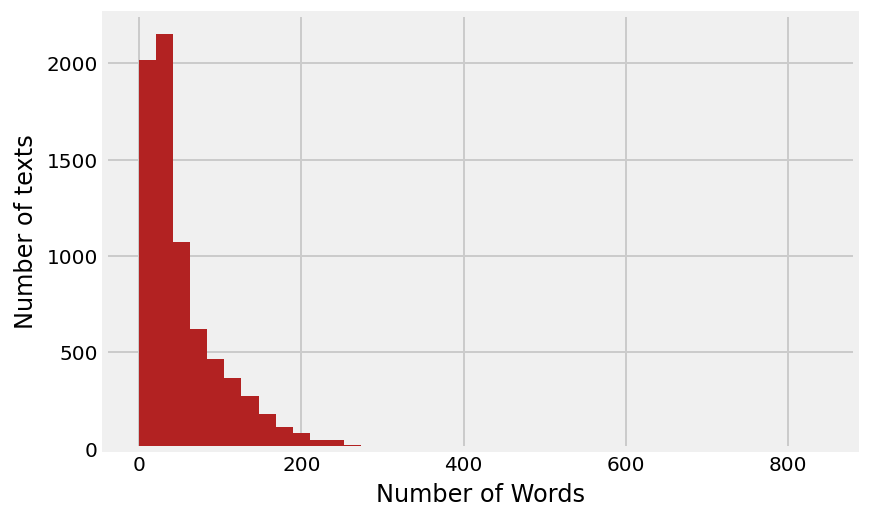

time: 379 ms (started: 2023-01-09 23:01:36 +00:00)


In [79]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [84]:
# BERT Tokeizer Functionality
sample_data = ["Build fake news model.", 
               "Using bert."]                                         # sample data
tokenized_sample_data = tokenizer.batch_encode_plus(sample_data,
                                                    padding=True)     # encode text
print(tokenized_sample_data)

# Ref: https://huggingface.co/docs/transformers/preprocessing

{'input_ids': [[2, 25102, 1050, 30357, 4425, 1371, 30470, 3], [2, 29236, 533, 30470, 3, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0, 0]]}
time: 6.3 ms (started: 2023-01-09 23:01:41 +00:00)


In [81]:
# Majority of titles above have word length under 15. So, we set max title length as 15
MAX_LENGHT = 15
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

time: 2.5 s (started: 2023-01-09 23:01:37 +00:00)


In [82]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

time: 31 ms (started: 2023-01-09 23:01:39 +00:00)


In [83]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

time: 1.95 ms (started: 2023-01-09 23:01:39 +00:00)


## Freeze Layers

In [56]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

time: 1.91 ms (started: 2023-01-09 09:20:01 +00:00)


## Define Model Architecture

In [57]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):  
      super(BERT_Arch, self).__init__()
      self.bert = bert   
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,10)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass  
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss() 
# Number of training epochs
epochs = 5

time: 59.6 ms (started: 2023-01-09 09:20:01 +00:00)


/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


time: 16.1 ms (started: 2022-11-14 21:45:40 +00:00)


##Define Train & Evaluate Function

In [58]:
# Defining training and evaluation functions
def train():  
  model.train()
  total_loss, total_accuracy = 0, 0
  
  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch 
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch  
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():  
  print("\nEvaluating...")  
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0  
  for step,batch in enumerate(val_dataloader):    # Iterate over batches  
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.     
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

time: 13.6 ms (started: 2023-01-09 09:20:01 +00:00)


## Model training

In [59]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))     
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), '/content/drive/MyDrive/thesis/c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 5
  Batch    50  of    229.
  Batch   100  of    229.
  Batch   150  of    229.
  Batch   200  of    229.

Evaluating...

Training Loss: 2.058
Validation Loss: 1.944

 Epoch 2 / 5
  Batch    50  of    229.
  Batch   100  of    229.
  Batch   150  of    229.
  Batch   200  of    229.

Evaluating...

Training Loss: 1.933
Validation Loss: 1.913

 Epoch 3 / 5
  Batch    50  of    229.
  Batch   100  of    229.
  Batch   150  of    229.
  Batch   200  of    229.

Evaluating...

Training Loss: 1.909
Validation Loss: 1.900

 Epoch 4 / 5
  Batch    50  of    229.
  Batch   100  of    229.
  Batch   150  of    229.
  Batch   200  of    229.

Evaluating...

Training Loss: 1.893
Validation Loss: 1.884

 Epoch 5 / 5
  Batch    50  of    229.
  Batch   100  of    229.
  Batch   150  of    229.
  Batch   200  of    229.

Evaluating...

Training Loss: 1.882
Validation Loss: 1.870
time: 29min 53s (started: 2023-01-09 09:20:01 +00:00)


## Model performance

In [60]:
# load weights of best model
#path = '/content/drive/MyDrive/thesis/c1_fakenews_weights.pt'
#model.load_state_dict(torch.load(path))

time: 302 µs (started: 2023-01-09 09:49:54 +00:00)


In [61]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.40      0.49      0.44       267
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00       172
           3       0.00      0.00      0.00        42
           4       0.33      0.14      0.20       334
           5       0.00      0.00      0.00        75
           6       0.00      0.00      0.00       171
           7       0.27      0.75      0.39       393
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00        35

    accuracy                           0.30      1570
   macro avg       0.10      0.14      0.10      1570
weighted avg       0.21      0.30      0.22      1570

time: 57.1 s (started: 2023-01-09 09:49:54 +00:00)


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Fake News Predictions

In [62]:
# # load weights of best model
# path = 'c1_fakenews_weights.pt'
# model.load_state_dict(torch.load(path))

time: 353 µs (started: 2023-01-09 09:50:51 +00:00)


In [63]:
# testing on unseen data
unseen_news_text = ["Video Presiden Joko Widodo Jenguk Lesti Kejora Di Rumah Sakit  Tanpa Kehadiran Rizky Billar",     # Fake
                    "mengapa satgasus dibubarkan setelah kasus Sambo Mencuat?",               # Fake
                    "Puluhan Orang Cidera Parah Gas Air Mata Hujani Masa Aksi 411 yang Sedang Sholat",           # Fake
                    "Muak Dengan Kelicikan Barat, Puluhan Kepala Negara Minta Jokowi Bentuk Sekaligus Pimpin PBB Baru"                          # Fake
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 200
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([7, 0, 7, 4])

time: 2.1 s (started: 2023-01-09 09:50:51 +00:00)
